# Treinar modelo Agglomerative

sobre a Clusterização Hierárquica (Agglomerative)
- Organiza os dados em uma hierarquia de clusters, o que facilita a visualização via dendrogramas.
- Não exige o número de clusters como entrada inicial, mas pode ser sensível a outliers e menos eficiente para grandes datasets.
***
Aplicar clusterização para segmentar clientes do WEBGEX com base em padrões de
compra (frequência, valor, categorias).

In [ ]:
# importação das bibliotecas 
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load, dump
from sklearn.preprocessing import StandardScaler

In [2]:
df_vendas = load('../../util/data/df_vendas.z')
df_produtos = load('../../util/data/df_produtos.z')
df_clientes = load('../../util/data/df_clientes.z')
df_unidades = load('../../util/data/df_unidades.z')
df_vendedores = load('../../util/data/df_vendedores.z')

In [ ]:
# agregação das informações principais por cliente do df_clientes
df_clientes_compra = df_vendas.groupby('codigo_cliente').agg({
    'total': 'sum', # valor total gasto
    'quantidade': 'sum', # quantidade total comprada
    'custo_medio': 'mean', # custo medio do produto
    'valor_desconto':'sum', # total de descontos recebidos
    'documento': 'count'# frequência de compras do cliente
}).rename(columns={'documento': 'frequencia_compras'}) # renomeando a coluna

# basicamente, vamos buscar valores como:
# - total gasto
# - quantidade total comprada
# - os descontos
# - custo medio do produto
# - frequencia de compra
# e tentar associar ao cliente

In [ ]:
# conversão de variáveis para o tipo correto (str)
df_vendas['codigo_produto'] = df_vendas['codigo_produto'].astype(str)
df_produtos['codigo'] = df_produtos['codigo'].astype(str)

# juntando os dados de vendas com os dados dos produtos
df_vendas_cat = df_vendas.merge( 
    df_produtos[['codigo', 'categoria']],
    left_on='codigo_produto', # associando pelo código do produto
    right_on='codigo', # renomeando a coluna de código do produto
    how='left' # left join
)

In [ ]:
# quantas vezes cada cliente comprou de cada categoria
df_categorias = pd.crosstab(
    df_vendas_cat['codigo_cliente'], 
    df_vendas_cat['categoria'])

# Junte essa tabela ao seu DataFrame de clientes agregados
df_clientes_final = df_clientes_compra.join(df_categorias)
df_clientes_final = df_clientes_final.fillna(0)

In [6]:
# padronizando valores
scaler = StandardScaler()
X = scaler.fit_transform(df_clientes_final)

In [ ]:
hierarchical_clustering_agglo = AgglomerativeClustering(n_clusters=5, linkage='ward') # 6 clusters, método de ligação ward

# realizando o agrupamento hierárquico
agglo_clusters = hierarchical_clustering_agglo.fit_predict(X)

# adicionando o cluster a clientes
df_clientes_final['cluster_agglo'] = agglo_clusters

# visualizando os segmentos criados nos clusters
print("tamanhos dos clusters:")
print(df_clientes_final['cluster_agglo'].value_counts())

Tamanhos dos clusters:
cluster_agglo
1    928
2     20
0     11
4      9
3      1
Name: count, dtype: int64


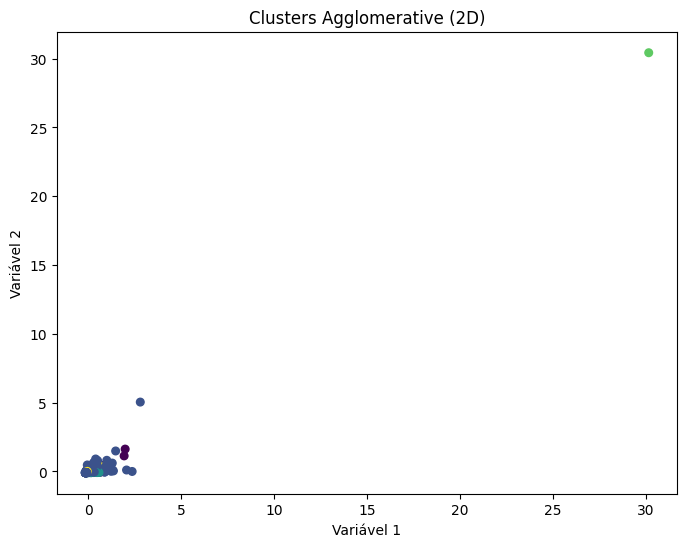

In [ ]:
# visualização dos clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agglo_clusters, cmap='viridis', s=30)
plt.xlabel('Variável 1')
plt.ylabel('Variável 2')
plt.title('clusters agglomerative (2D)')
plt.show()

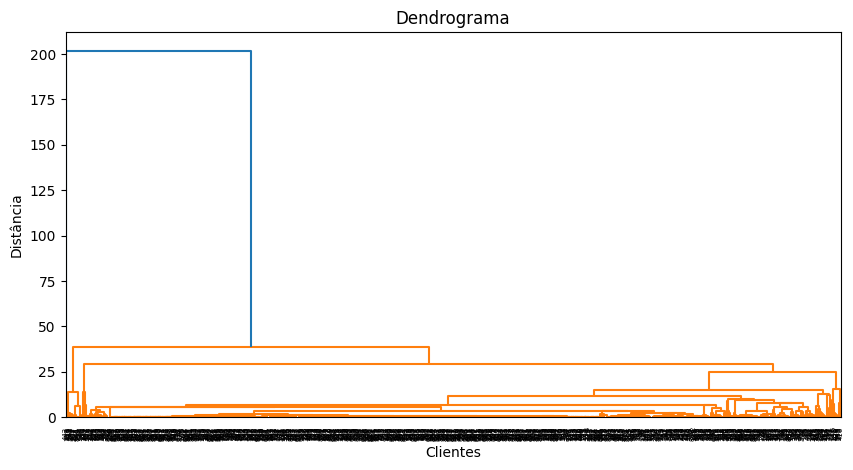

In [ ]:
# dendrograma para visualização dos clusters

linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.show()

# conclusão

De acordo como output do modelo Agglomerative, pode notar os seguintes segmentos:
